In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-extensive-dataset/IMDb title_principals.csv
/kaggle/input/imdb-extensive-dataset/IMDb names.csv
/kaggle/input/imdb-extensive-dataset/IMDb movies.csv
/kaggle/input/imdb-extensive-dataset/IMDb ratings.csv
/kaggle/input/netflix-shows/netflix_titles.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_theme(style="whitegrid")

from collections import Counter

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
netflix = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
netflix.shape

(7787, 12)

In [5]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
netflix.duplicated().sum()

0

In [8]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [9]:
#Filling na values

netflix["country"]= netflix["country"].fillna(netflix["country"].mode()[0])
netflix["rating"]= netflix["rating"].fillna(netflix["rating"].mode()[0])
netflix['director'] = netflix['director'].fillna("Unknown")
netflix['cast'] = netflix['cast'].fillna("Unknown")

In [10]:
#drop date_added isna
netflix = netflix[netflix['date_added'].notna()]

In [11]:
#Split date_added
netflix['year_added'] = netflix['date_added'].apply(lambda x: x.split(" ")[-1])
netflix['year_added'].head()

0    2020
1    2016
2    2018
3    2017
4    2020
Name: year_added, dtype: object

In [12]:
#Split date_added
netflix['month_added'] = netflix['date_added'].apply(lambda x: x.split(" ")[0])
netflix['month_added'].head()

0      August
1    December
2    December
3    November
4     January
Name: month_added, dtype: object

In [13]:
#drop

#netflix.drop('cast',axis=1,inplace=True)
#netflix.drop("director",axis=1,inplace=True)
#netflix.drop("show_id",axis=1,inplace=True)

netflix.drop("description",axis=1,inplace=True)

In [14]:
#Change data type
#netflix['director'] = netflix['director'].astype('category')
#netflix['cast'] = netflix['cast'].astype('category')
#netflix['listed_in'] = netflix['listed_in'].astype('category')

netflix['type'] = netflix['type'].astype('category')
netflix['country'] = netflix['country'].astype('category')

netflix['rating'] = netflix['rating'].astype('category')

In [15]:
#Change data type

netflix['year_added'] = netflix['year_added'].astype('int')
netflix['date_added'] = pd.to_datetime(netflix['date_added'])

In [16]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7777 non-null   object        
 1   type          7777 non-null   category      
 2   title         7777 non-null   object        
 3   director      7777 non-null   object        
 4   cast          7777 non-null   object        
 5   country       7777 non-null   category      
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7777 non-null   int64         
 8   rating        7777 non-null   category      
 9   duration      7777 non-null   object        
 10  listed_in     7777 non-null   object        
 11  year_added    7777 non-null   int64         
 12  month_added   7777 non-null   object        
dtypes: category(3), datetime64[ns](1), int64(2), object(7)
memory usage: 721.0+ KB


In [17]:
netflix["month_added"]= netflix["month_added"].fillna(netflix["month_added"].mode()[0])

In [18]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",2020,August
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",2016,December
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies",2018,December
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",2017,November
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,2020,January


# EDA: Explore data insights #

<h2> TV Shows or Movies </h2>

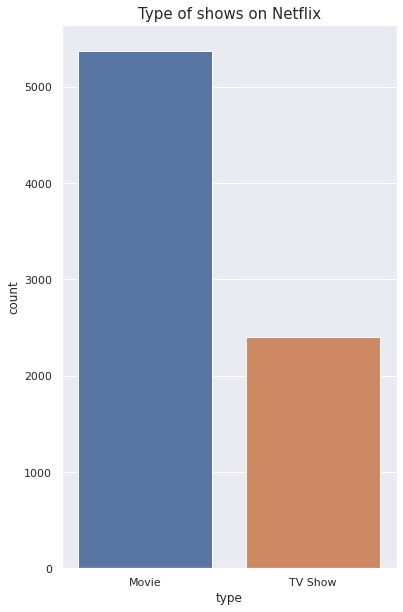

In [19]:
#Type of shows on Netflix
sns.set(rc={'figure.figsize':(6,10)})
sns.countplot(x='type',data = netflix)
    
plt.title('Type of shows on Netflix', size = '15');

<h2> Age-appropriate TV shows/movies </h2>

**The TV Parental Guidelines**

1. TV-Y:
All Children \
This program is designed to be appropriate for all children.

2. TV-Y7:
Older Children  \
This program is designed for children age 7 and above.

3. TV-Y7-FV:
Older Children  \
This program is designed for children age 7 and above and includes strong fantasy violence.

4. TV-G:
General Audience  \
Most parents would find this program suitable for all ages.

5. TV-PG:
Parental Guidance Suggested  \
This program contains material that parents may find unsuitable for younger children.

6. TV-14:
Parents Strongly Cautioned  \
This program contains some material that many parents would find unsuitable for children less than 14 years of age.

7. TV-MA:
Mature Audience Only  \
This program is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17.

**Film Rating System (Motion Picture Association, USA)** 

1. G – General Audiences  \
All ages admitted. Nothing that would offend parents for viewing by children.

2. PG - Parental Guidance Suggested  \
Some material may not be suitable for children. Parents urged to give "parental guidance". May contain some material parents might not like for their young children.

3. PG-13 - Parents Strongly Cautioned  \
Some material may be inappropriate for children under 13. Parents are urged to be cautious. Some material may be inappropriate for pre-teenagers.

4. R - Restricted  \
Under 17 requires accompanying parent or adult guardian. Contains some adult material. Parents are urged to learn more about the film before taking their young children with them.

5. NC-17 – Adults Only  \
No One 17 and Under Admitted. Clearly adult. Children are not admitted.

6. Not Rated (NR) or Unrated (UR)  \
A film has not been submitted for a rating or is an uncut version of a film that was submitted

In [20]:
net_rating = netflix.rating.unique()
net_rating

['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', ..., 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR']
Length: 14
Categories (14, object): ['TV-MA', 'R', 'PG-13', 'TV-14', ..., 'G', 'NC-17', 'TV-Y7-FV', 'UR']

In [21]:
#add ratings ages with some category (older kids , adults , teens , kids)
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

#add the new col with rating_ages
netflix['target_ages'] = netflix['rating'].replace(ratings_ages)

netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,target_ages
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",2020,August,Adults
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",2016,December,Adults
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies",2018,December,Adults
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",2017,November,Teens
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,2020,January,Teens


In [22]:
netflix['rating'].value_counts()

TV-MA       2868
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

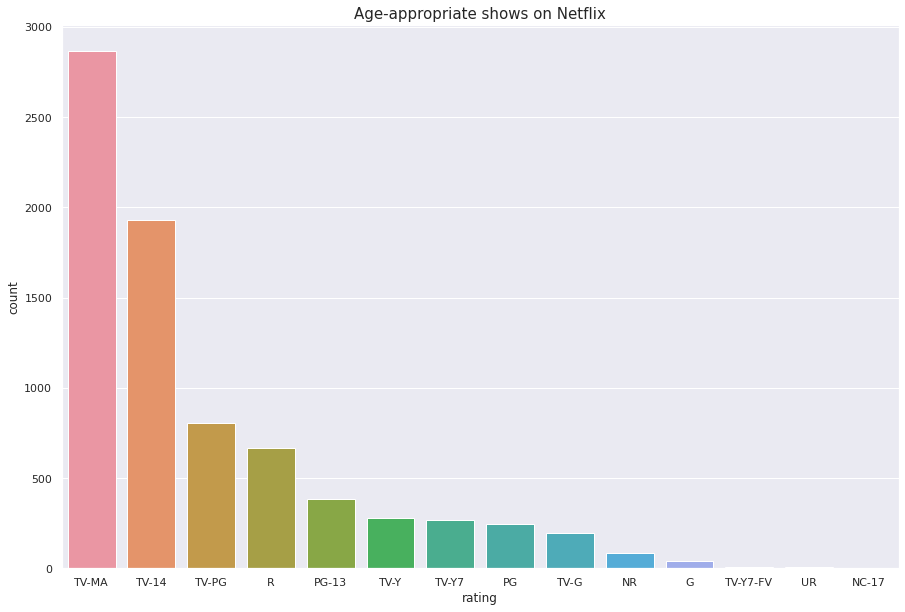

In [23]:
sns.set(rc={'figure.figsize':(15,10)})
sns.countplot(x ='rating',data = netflix, order = netflix['rating'].value_counts().index[0:])
plt.title('Age-appropriate shows on Netflix', size = '15');

In [24]:
netflix['target_ages'].value_counts()

Adults        3624
Teens         2314
Older Kids    1327
Kids           512
Name: target_ages, dtype: int64

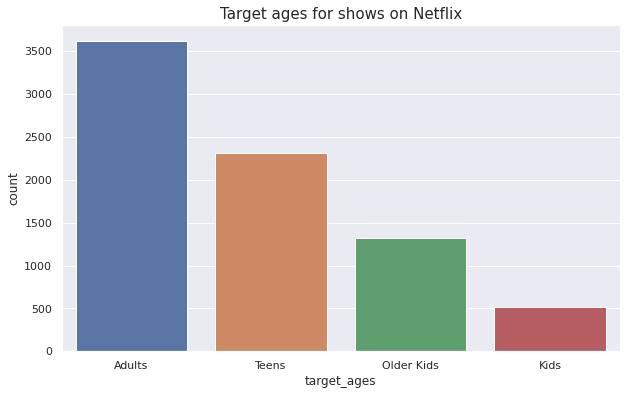

In [25]:
#ages_count = netflix.groupby(['target_ages'])['show_id'].count().reset_index(name = 'count').sort_values(by = 'count',ascending=False)

sns.set(rc={'figure.figsize':(10,6)})
sns.countplot(x = 'target_ages', data = netflix, order = netflix['target_ages'].value_counts().index[0:])
plt.title('Target ages for shows on Netflix', size = '15');

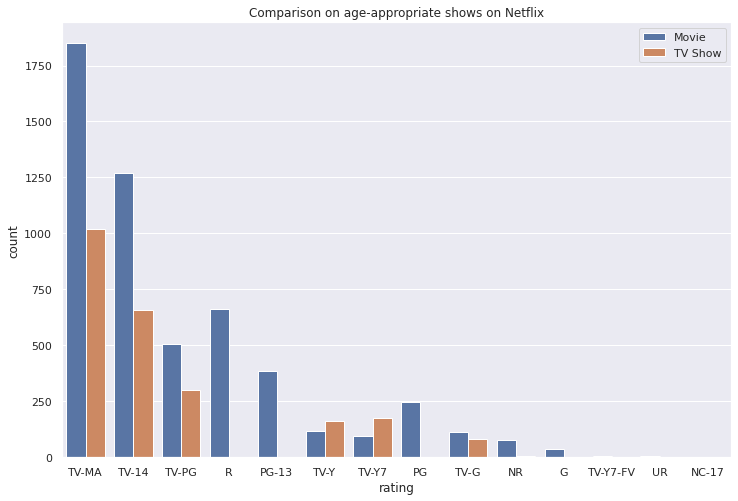

In [26]:
sns.set(rc={'figure.figsize':(12,8)})
sns.countplot(x='rating',data = netflix, hue='type', order = netflix['rating'].value_counts().index[0:])

plt.legend(loc='upper right')
plt.title('Comparison on age-appropriate shows on Netflix');

<h2> Penetration Over the Years </h2>

In [27]:
#Create subset for movies and TV shows

movies = netflix[netflix.type == 'Movie']
tvshows = netflix[netflix.type == 'TV Show']

In [28]:
#How many movies/TV shows were released in each year?

movies_re_year = movies.groupby('release_year').count()
tvshows_re_year = tvshows.groupby('release_year').count()

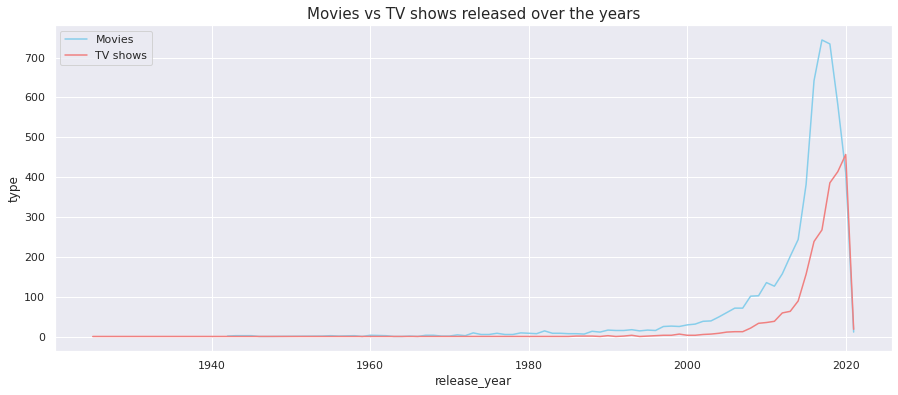

In [29]:
#Plot movies and TV shows released over the years

sns.set(rc={'figure.figsize':(15,6)})
sns.lineplot(x='release_year',y='type', data=movies_re_year, color = 'skyblue')
sns.lineplot(x='release_year', y='type', data=tvshows_re_year, color = 'lightcoral')

plt.legend(['Movies','TV shows'])
plt.title('Movies vs TV shows released over the years', size='15');

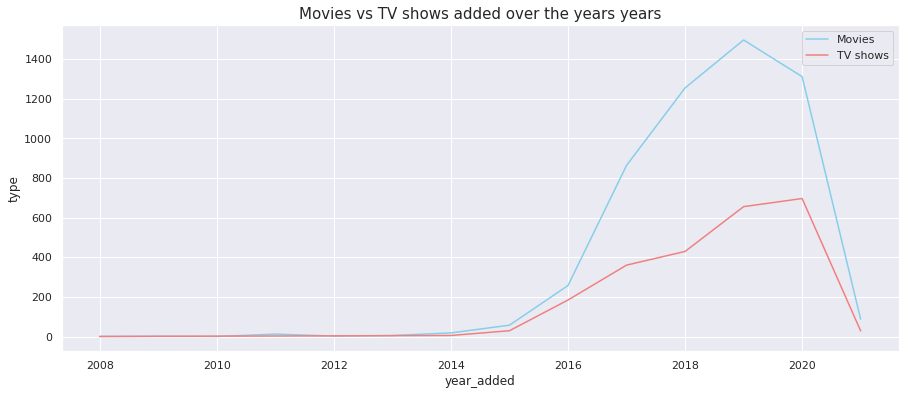

In [30]:
#plot movies and TV shows added over the years on Netflix

movies_year_added = movies.groupby(['year_added']).count()
tvshows_year_added = tvshows.groupby(['year_added']).count()

sns.set(rc={'figure.figsize':(15,6)})
sns.lineplot(x='year_added',y='type', data=movies_year_added, color = 'skyblue')
sns.lineplot(x='year_added', y='type', data=tvshows_year_added, color = 'lightcoral')

plt.legend(['Movies','TV shows'])
plt.title('Movies vs TV shows added over the years years', size='15');

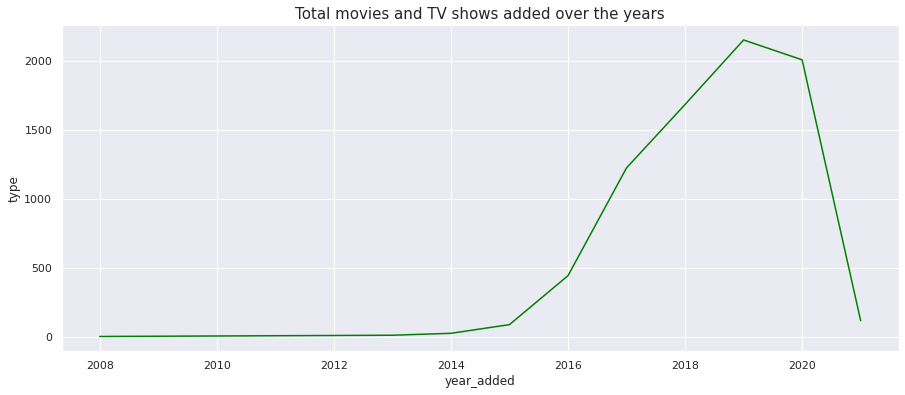

In [31]:
total_added = movies_year_added + tvshows_year_added
sns.lineplot(x='year_added', y='type', data=total_added, color= 'green')
plt.title("Total movies and TV shows added over the years", size='15');

In [87]:
month_counts = netflix.groupby(['month_added'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)[:-1]
month_counts

,month_added,count
3,December,817
11,October,780
5,January,746
10,November,730
8,March,661
12,September,614
2,August,612
1,April,596
6,July,592
7,June,538


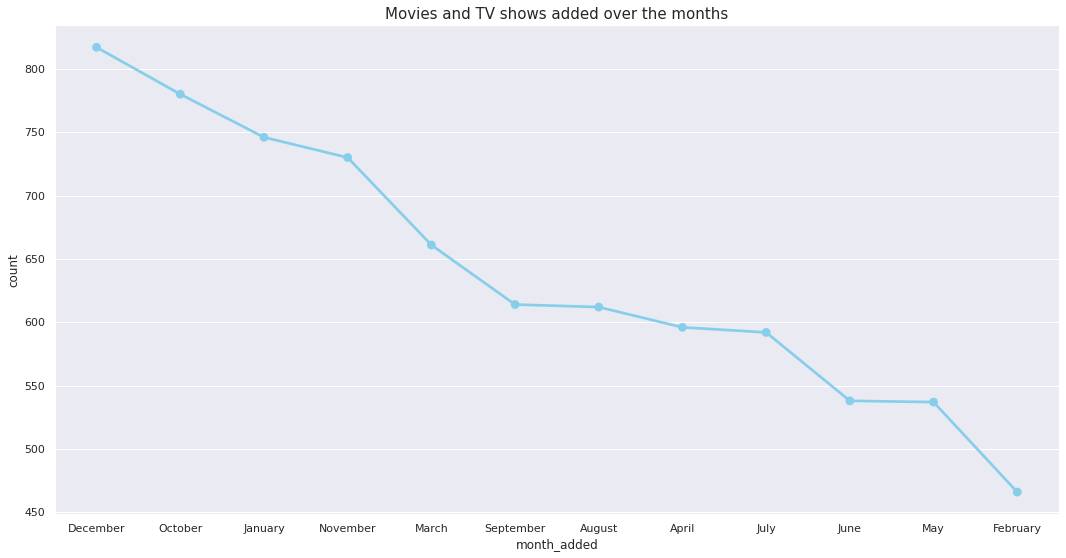

In [107]:
sns.set(rc={'figure.figsize':(18,9)})
sns.pointplot(x='month_added', y='count', data=month_counts, color = 'skyblue')
plt.title("Movies and TV shows added over the months", size='15');

<h2> Countries with the most content </h2>

In [109]:
country_array = [country.split(", ") for country in netflix['country']]
unique_country = {country.strip() for countries in country_array for country in countries}

unique_country.discard('')
unique_country = pd.Series(sorted(unique_country))
unique_country

0       Afghanistan
1           Albania
2           Algeria
3            Angola
4         Argentina
           ...     
116    Vatican City
117       Venezuela
118         Vietnam
119    West Germany
120        Zimbabwe
Length: 121, dtype: object

In [110]:
country_counts  = dict.fromkeys(unique_country, 0)

for idx, row in netflix.iterrows():
    for country in row['country'].split(", "):
        if country != '':
            country_counts[country] += 1

country_counts

{'Afghanistan': 1,
 'Albania': 1,
 'Algeria': 2,
 'Angola': 1,
 'Argentina': 82,
 'Armenia': 1,
 'Australia': 143,
 'Austria': 11,
 'Azerbaijan': 1,
 'Bahamas': 1,
 'Bangladesh': 3,
 'Belarus': 1,
 'Belgium': 85,
 'Bermuda': 1,
 'Botswana': 1,
 'Brazil': 88,
 'Bulgaria': 9,
 'Cambodia': 4,
 'Cambodia,': 1,
 'Canada': 412,
 'Cayman Islands': 2,
 'Chile': 26,
 'China': 147,
 'Colombia': 45,
 'Croatia': 4,
 'Cuba': 1,
 'Cyprus': 1,
 'Czech Republic': 20,
 'Denmark': 44,
 'Dominican Republic': 1,
 'East Germany': 1,
 'Ecuador': 1,
 'Egypt': 110,
 'Finland': 11,
 'France': 349,
 'Georgia': 2,
 'Germany': 199,
 'Ghana': 4,
 'Greece': 10,
 'Guatemala': 2,
 'Hong Kong': 102,
 'Hungary': 9,
 'Iceland': 9,
 'India': 990,
 'Indonesia': 80,
 'Iran': 4,
 'Iraq': 2,
 'Ireland': 40,
 'Israel': 26,
 'Italy': 90,
 'Jamaica': 1,
 'Japan': 286,
 'Jordan': 8,
 'Kazakhstan': 1,
 'Kenya': 5,
 'Kuwait': 7,
 'Latvia': 1,
 'Lebanon': 26,
 'Liechtenstein': 1,
 'Lithuania': 1,
 'Luxembourg': 11,
 'Malawi': 1,
 '

In [111]:
df_country_counts = pd.DataFrame.from_dict(country_counts, orient = 'index',columns = ['Count'])
top_countries_content = df_country_counts.reset_index().sort_values(by='Count',ascending=False).head(10)
top_countries_content

,index,Count
113,United States,3796
43,India,990
111,United Kingdom,721
19,Canada,412
34,France,349
51,Japan,286
99,Spain,215
97,South Korea,212
36,Germany,199
65,Mexico,154


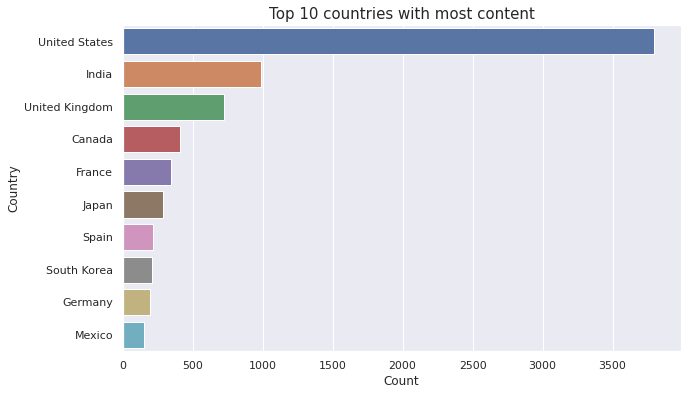

In [112]:
sns.set(rc={'figure.figsize':(10,6)})
sns.barplot(y='index', x='Count', data = top_countries_content)

plt.ylabel('Country')
plt.title('Top 10 countries with most content', size = '15');

In [ ]:
#netflix.groupby('country')['show_id'].count()
#netflix.groupby('country')['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False).head(10)
#Top 10 countries with most content
#sns.set(rc={'figure.figsize':(10,6)})
#sns.countplot(y = 'country', data = netflix, order = netflix['country'].value_counts().index[0:10])
#plt.title('Top 10 countries with most content', size = '15');

In [113]:
#Country counts in movies subset

movies_country_counts  = dict.fromkeys(unique_country, 0)

for idx, row in movies.iterrows():
    for country in row['country'].split(", "):
        if country != '':
            movies_country_counts[country] += 1

#movies_country_counts

#Country counts in TV shows subset

tv_country_counts  = dict.fromkeys(unique_country, 0)

for idx, row in tvshows.iterrows():
    for country in row['country'].split(", "):
        if country != '':
            tv_country_counts[country] += 1

#tv_country_counts

In [114]:
#Convert to pd DataFrame

#Movies subset
df_movies_country_counts = pd.DataFrame.from_dict(movies_country_counts, orient = 'index',columns = ['Count'])
movies_top_countries = df_movies_country_counts.reset_index().sort_values(by='Count',ascending=False).head(10)

df_tv_country_counts = pd.DataFrame.from_dict(tv_country_counts, orient = 'index',columns = ['Count'])
tv_top_countries = df_tv_country_counts.reset_index().sort_values(by='Count',ascending=False).head(10)

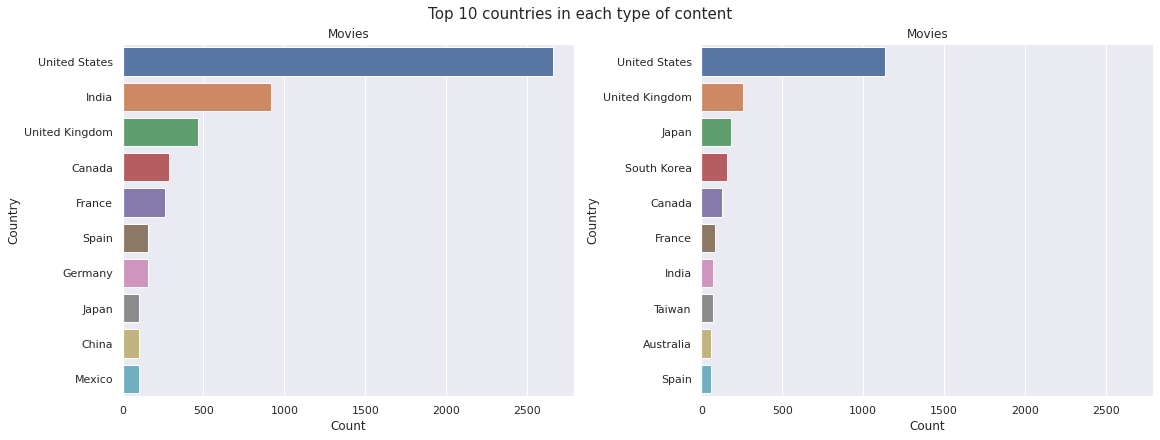

In [115]:
#Top countries for each type of content

fig, ax = plt.subplots(1, 2, sharex=True, figsize=(16,6), constrained_layout=True)
fig.suptitle("Top 10 countries in each type of content",size='15')

sns.barplot(ax=ax[0], y='index', x='Count', data = movies_top_countries)
ax[0].set_title('Movies')
ax[0].set_ylabel('Country')

sns.barplot(ax=ax[1], y='index', x='Count', data = tv_top_countries)
ax[1].set_title('Movies')
ax[1].set_ylabel('Country');

In [ ]:
#Top countries for each type of content

#fig, ax = plt.subplots(1, 2, sharex=True, figsize=(16,6), constrained_layout=True)
#fig.suptitle("Top 10 countries in each type of content",size='15')

#sns.countplot(ax=ax[0], y = 'country', data = movies, order = movies['country'].value_counts().index[0:10])
#ax[0].set_title('Movies')

#sns.countplot(ax=ax[1], y = 'country', data = tvshows, order = tvshows['country'].value_counts().index[0:10])
#ax[1].set_title('TV shows');

In [116]:
#col = "listed_in"

categories = ", ".join(movies['listed_in']).split(", ")
counter_list = Counter(categories).most_common()
counter_list = pd.DataFrame(counter_list, columns = ['Genres','Count'])
counter_list

,Genres,Count
0,International Movies,2437
1,Dramas,2106
2,Comedies,1471
3,Documentaries,786
4,Action & Adventure,721
5,Independent Movies,673
6,Children & Family Movies,532
7,Romantic Movies,531
8,Thrillers,491
9,Stand-Up Comedy,329


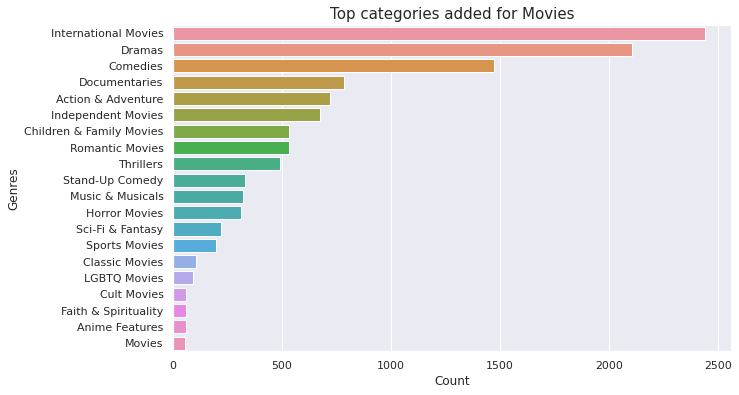

In [117]:
#Plot

sns.set(rc={'figure.figsize':(10,6)})
sns.barplot(y = 'Genres', x = 'Count', data = counter_list)
plt.title('Top categories added for Movies', size = '15');

In [118]:
categories_2 = ", ".join(tvshows['listed_in']).split(", ")
counter_list_2 = Counter(categories_2).most_common()
counter_list_2 = pd.DataFrame(counter_list_2, columns = ['Genres','Count'])
counter_list_2

,Genres,Count
0,International TV Shows,1198
1,TV Dramas,703
2,TV Comedies,518
3,Crime TV Shows,426
4,Kids' TV,412
5,Docuseries,352
6,Romantic TV Shows,333
7,British TV Shows,231
8,Reality TV,222
9,Korean TV Shows,150


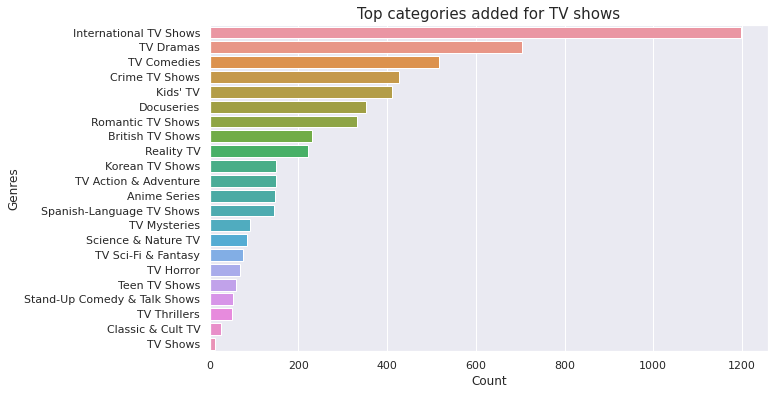

In [119]:
#Plot

sns.set(rc={'figure.figsize':(10,6)})
sns.barplot(y = 'Genres', x = 'Count', data = counter_list_2)
plt.title('Top categories added for TV shows', size = '15');

In [ ]:
#fig, ax = plt.subplots(2, 1, sharex=True, figsize=(16,6), constrained_layout=True)
#fig.suptitle("Top 10 genres of each type of content",size='15')

#sns.countplot(ax=ax[0], y = 'listed_in', data = movies, order = movies['listed_in'].value_counts().index[0:10])
#ax[0].set_title('Movies')

#sns.countplot(ax=ax[1], y = 'listed_in', data = tvshows, order = tvshows['listed_in'].value_counts().index[0:10])
#ax[1].set_title('TV shows');

<h2> Directors with the most titles </h2>

In [ ]:
#top_director = netflix.groupby(['director'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)

In [120]:
categories_3 = ", ".join(netflix['director']).split(", ")
counter_list_3 = Counter(categories_3).most_common()
counter_list_3 = pd.DataFrame(counter_list_3, columns = ['Director','Count'])

top_directors = counter_list_3[1:11]
top_directors

,Director,Count
1,Jan Suter,21
2,Raúl Campos,19
3,Marcus Raboy,16
4,Jay Karas,15
5,Cathy Garcia-Molina,13
6,Youssef Chahine,12
7,Martin Scorsese,12
8,Jay Chapman,12
9,Steven Spielberg,10
10,Shannon Hartman,9


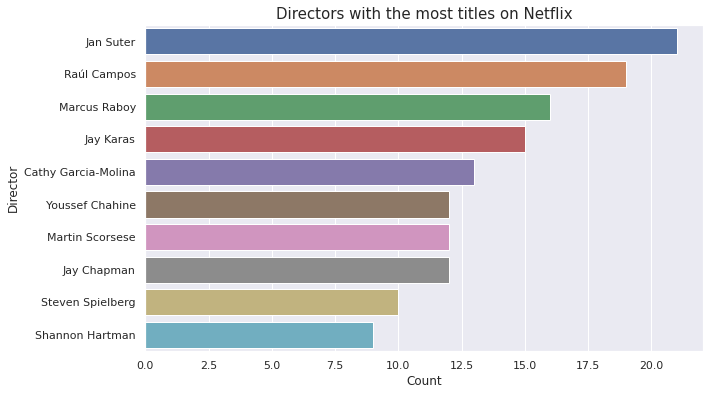

In [121]:
sns.set(rc={'figure.figsize':(10,6)})
sns.barplot(y = 'Director', x = 'Count', data = top_directors)
plt.title('Directors with the most titles on Netflix', size = '15');

# IMDB ratings and Netflix #

In [122]:
imdb_ratings = pd.read_csv('/kaggle/input/imdb-extensive-dataset/IMDb ratings.csv')
imdb_titles = pd.read_csv('/kaggle/input/imdb-extensive-dataset/IMDb movies.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [123]:
imdb_ratings.head()

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,...,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,5.2,446,5.3,5.0,15,8,16,62,98,...,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,7.0,2237,6.9,7.0,210,225,436,641,344,...,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


In [124]:
imdb_titles.head(2)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0


In [125]:
imdb_titles.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

In [126]:
ratings = pd.DataFrame({'Title':imdb_titles.title,
                    'Release Year':imdb_titles.year,
                    'Rating': imdb_ratings.weighted_average_vote,
                    'Genre': imdb_titles.genre,
                    'Director': imdb_titles.director,
                    'Studio': imdb_titles.production_company})
ratings.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)
ratings.shape

(85852, 6)

In [127]:
ratings.head()

,Title,Release Year,Rating,Genre,Director,Studio
0,Miss Jerry,1894,5.9,Romance,Alexander Black,Alexander Black Photoplays
1,The Story of the Kelly Gang,1906,6.1,"Biography, Crime, Drama",Charles Tait,J. and N. Tait
2,Den sorte drøm,1911,5.8,Drama,Urban Gad,Fotorama
3,Cleopatra,1912,5.2,"Drama, History",Charles L. Gaskill,Helen Gardner Picture Players
4,L'Inferno,1911,7.0,"Adventure, Drama, Fantasy","Francesco Bertolini, Adolfo Padovan",Milano Film


In [ ]:
#netflix['duration_unit'] = netflix['duration'].apply(lambda x: x.split(" ")[0])
#netflix.head()

#joint.drop("show_id",axis=1,inplace=True)
#joint.drop('date_added', axis=1, inplace=True)

In [128]:
netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,target_ages
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",2020,August,Adults
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",2016,December,Adults


In [129]:
netflix.drop('director', axis=1, inplace=True)
netflix.drop('date_added',axis=1, inplace=True)
netflix.drop('listed_in',axis=1, inplace=True)

In [130]:
ratings.dropna()

joint = ratings.merge(netflix,left_on='Title',right_on='title', how='inner')
joint = joint.sort_values(by='Rating', ascending=False)

joint.head(2)

,Title,Release Year,Rating,Genre,Director,Studio,show_id,type,title,cast,country,release_year,rating,duration,year_added,month_added,target_ages
1000,Breakout,2019,9.0,"Adventure, Comedy, Drama",NaN,Tycer Studios,s1093,TV Show,Breakout,"Jeanette Aw, Elvin Ng, Zhou Ying, Christopher ...",United States,2010,TV-14,1 Season,2017,July,Teens
989,Innocent,2017,9.0,Comedy,Marc-André Lavoie,Orange Médias,s3009,TV Show,Innocent,"Ali Atay, Haluk Bilginer, Nur Sürer, Okan Yala...",Turkey,2017,TV-MA,1 Season,2019,January,Adults


In [131]:
joint.shape

(2737, 17)

In [132]:
#Top ten rated Movies/TV shows
top_ten_rated = joint[0:10]
top_ten_rated

,Title,Release Year,Rating,Genre,Director,Studio,show_id,type,title,cast,country,release_year,rating,duration,year_added,month_added,target_ages
1000,Breakout,2019,9.0,"Adventure, Comedy, Drama",NaN,Tycer Studios,s1093,TV Show,Breakout,"Jeanette Aw, Elvin Ng, Zhou Ying, Christopher ...",United States,2010,TV-14,1 Season,2017,July,Teens
989,Innocent,2017,9.0,Comedy,Marc-André Lavoie,Orange Médias,s3009,TV Show,Innocent,"Ali Atay, Haluk Bilginer, Nur Sürer, Okan Yala...",Turkey,2017,TV-MA,1 Season,2019,January,Adults
398,Pulp Fiction,1994,8.9,"Crime, Drama",Quentin Tarantino,Miramax,s5003,Movie,Pulp Fiction,"John Travolta, Samuel L. Jackson, Uma Thurman,...",United States,1994,R,154 min,2019,January,Adults
380,Schindler's List,1993,8.9,"Biography, Drama, History",Steven Spielberg,Universal Pictures,s5431,Movie,Schindler's List,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",United States,1993,R,195 min,2018,April,Adults
1299,Inception,2010,8.8,"Action, Adventure, Sci-Fi",Christopher Nolan,Warner Bros.,s2980,Movie,Inception,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...","United States, United Kingdom",2010,PG-13,148 min,2020,January,Teens
1667,Much Ado About Nothing,2011,8.6,"Comedy, Romance",Robert Delamere,Sonia Friedman Productions,s4266,Movie,Much Ado About Nothing,"Agustín Silva, Paulina García, Daniel Alcaíno,...","Chile, United States, France",2016,TV-MA,96 min,2016,October,Adults
1972,Eh Janam Tumhare Lekhe,2015,8.6,Biography,Harjit Singh,White Hill Production,s1933,Movie,Eh Janam Tumhare Lekhe,"Pavan Malhotra, Sudhanshu Aggarwal, Arjuna Bha...",India,2015,TV-14,124 min,2017,December,Teens
2667,Ani... Dr. Kashinath Ghanekar,2018,8.6,Drama,Abhijeet Shirish Deshpande,Viacom18 Motion Pictures,s527,Movie,Ani... Dr. Kashinath Ghanekar,"Subodh Bhave, Vaidehi Parshurami, Nandita Patk...",India,2018,TV-14,157 min,2020,September,Teens
227,Gol Maal,1979,8.6,"Comedy, Romance",Hrishikesh Mukherjee,Rupam Chitra,s2464,Movie,Gol Maal,"Amol Palekar, Bindiya Goswami, Deven Verma, Ut...",India,1979,TV-PG,137 min,2019,December,Older Kids
734,City of God,2002,8.6,"Crime, Drama","Fernando Meirelles, Kátia Lund",O2 Filmes,s1401,Movie,City of God,"Alexandre Rodrigues, Leandro Firmino, Phellipe...","Brazil, France, Germany",2002,R,130 min,2020,January,Adults


In [ ]:
#country_count = joint['country'].value_counts().sort_values(ascending=False)
#country_count = pd.DataFrame(country_count)
#top_countries = country_count[0:10]
#top_countries

In [ ]:
#top_director = joint.groupby(['director'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
#top_director.head(10)

In [133]:
genre = ", ".join(joint['Genre']).split(", ")
genre_list = Counter(genre).most_common()
genre_list = pd.DataFrame(genre_list, columns = ['Genres','Count'])
genre_list

,Genres,Count
0,Drama,1631
1,Comedy,784
2,Thriller,600
3,Action,582
4,Romance,464
5,Crime,415
6,Horror,349
7,Mystery,210
8,Adventure,199
9,Sci-Fi,144


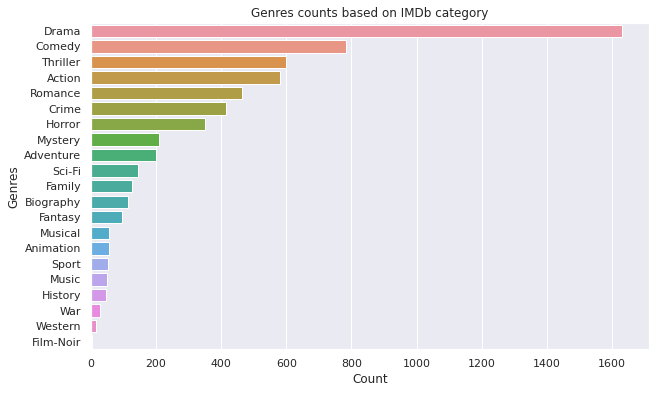

In [134]:
sns.set(rc={'figure.figsize':(10,6)})
sns.barplot(x = 'Count', y = 'Genres', data = genre_list)
plt.title("Genres counts based on IMDb category");

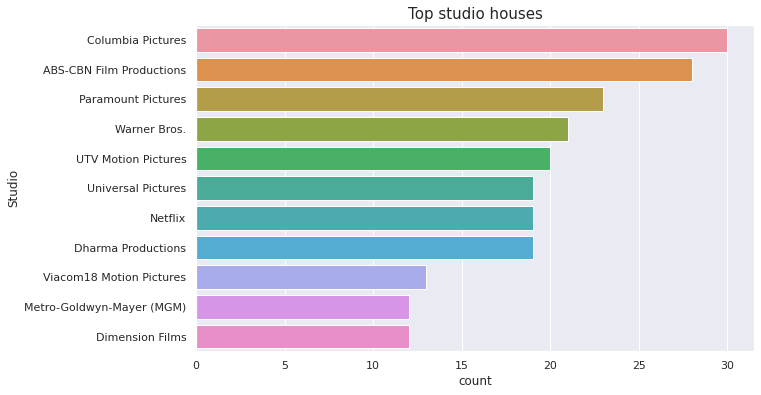

In [135]:
sns.set(rc={'figure.figsize':(10,6)})
sns.countplot(y = 'Studio', data = joint, order = joint['Studio'].value_counts().index[0:11])
plt.title('Top studio houses', size = '15');

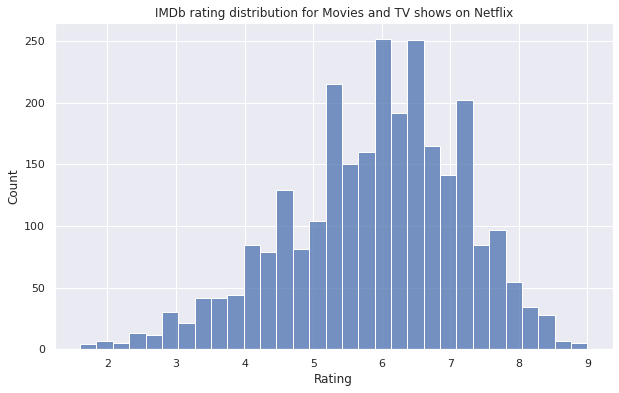

In [136]:
sns.histplot(data=joint['Rating'])
plt.title('IMDb rating distribution for Movies and TV shows on Netflix');

In [137]:
#Netflix Originals

netflix_studio = joint.loc[joint['Studio'] == 'Netflix']
netflix_studio.shape

(19, 17)

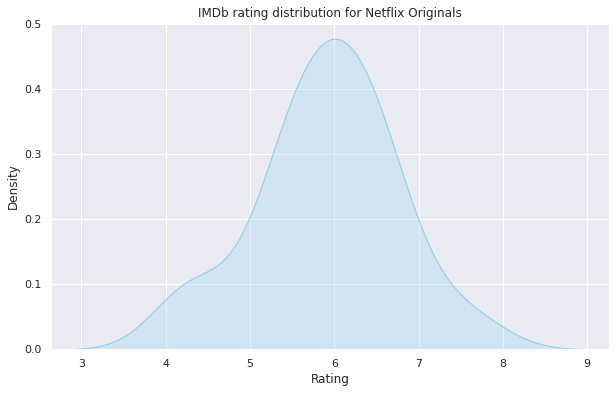

In [143]:
sns.kdeplot(data=netflix_studio['Rating'], shade=True, color='skyblue')
plt.title('IMDb rating distribution for Netflix Originals');

In [139]:
netflix_studio.sort_values(by='Rating',ascending=False)[:5]

,Title,Release Year,Rating,Genre,Director,Studio,show_id,type,title,cast,country,release_year,rating,duration,year_added,month_added,target_ages
1089,Yeh Ballet,2020,7.6,Drama,Sooni Taraporevala,Netflix,s7702,Movie,Yeh Ballet,"Julian Sands, Manish Chauhan, Achintya Bose, J...",India,2020,TV-MA,117 min,2020,February,Adults
2221,The Meyerowitz Stories (New and Selected),2017,6.9,"Comedy, Drama",Noah Baumbach,Netflix,s6663,Movie,The Meyerowitz Stories (New and Selected),"Adam Sandler, Ben Stiller, Dustin Hoffman, Eli...",United States,2017,TV-MA,113 min,2017,October,Adults
2472,Next Gen,2018,6.6,"Animation, Action, Adventure","Kevin R. Adams, Joe Ksander",Netflix,s4459,Movie,Next Gen,"John Krasinski, Charlyne Yi, Jason Sudeikis, M...","China, Canada, United States",2018,TV-PG,106 min,2018,September,Older Kids
1683,Bird Box,2018,6.6,"Drama, Horror, Sci-Fi",Susanne Bier,Netflix,s935,Movie,Bird Box,"Sandra Bullock, Trevante Rhodes, John Malkovic...",United States,2018,R,124 min,2018,December,Adults
2238,ARQ,2016,6.4,"Action, Sci-Fi, Thriller",Tony Elliott,Netflix,s583,Movie,ARQ,"Robbie Amell, Rachael Taylor, Shaun Benson, Gr...","Canada, United States",2016,TV-MA,89 min,2016,September,Adults


# Analysis duration of movies on Netflix #

In [144]:
movies['duration'] = movies['duration'].str.replace(' min','')
movies['duration'] = movies['duration'].astype(str).astype(int)
movies['duration']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1        93
2        78
3        80
4       123
6        95
       ... 
7781     88
7782     99
7783    111
7784     44
7786     90
Name: duration, Length: 5377, dtype: int64

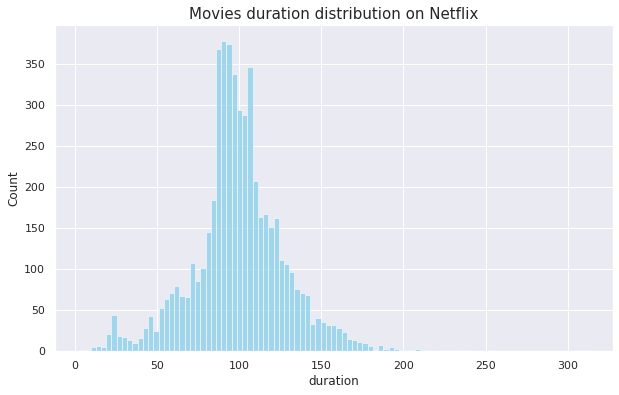

In [148]:
sns.histplot(data=movies['duration'], color='skyblue')
plt.title("Movies duration distribution on Netflix", size='15');

In [ ]:
# plotting correlation heatmap

#dataplot = sns.heatmap(joint.corr(), cmap="YlGnBu", annot=True)

# Modeling #

In [149]:
netflix_studio.describe()

,Rating,release_year,year_added
count,19.000000,19.000000,19.000000
mean,5.910526,2018.210526,2018.210526
std,0.815744,1.548438,1.548438
min,4.300000,2015.000000,2015.000000
25%,5.500000,2017.500000,2017.500000
50%,6.000000,2019.000000,2019.000000
75%,6.400000,2019.000000,2019.000000
max,7.600000,2020.000000,2020.000000


In [150]:
netflix.describe

<bound method NDFrame.describe of      show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

                                                   cast  \
0     João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Demián Bichir, Héctor Bonilla, Oscar Serrano, ...

In [151]:
#List movies and TV shows added in year

netflix_2008 = netflix.loc[netflix['year_added'] == 2008]
netflix_2009 = netflix.loc[netflix['year_added'] == 2009]
netflix_2010 = netflix.loc[netflix['year_added'] == 2010]
netflix_2011 = netflix.loc[netflix['year_added'] == 2011]
netflix_2012 = netflix.loc[netflix['year_added'] == 2012]
netflix_2013 = netflix.loc[netflix['year_added'] == 2013]
netflix_2014 = netflix.loc[netflix['year_added'] == 2014]
netflix_2015 = netflix.loc[netflix['year_added'] == 2015]
netflix_2016 = netflix.loc[netflix['year_added'] == 2016]
netflix_2017 = netflix.loc[netflix['year_added'] == 2017]
netflix_2018 = netflix.loc[netflix['year_added'] == 2018]
netflix_2019 = netflix.loc[netflix['year_added'] == 2019]
netflix_2020 = netflix.loc[netflix['year_added'] == 2020]

In [152]:
#Count total movies and tv shows added in year

def total_data(netflix_year):
    total_movies = len(netflix_year[:][netflix_year["type"] == "Movie"])
    total_tv_shows = len(netflix_year[:][netflix_year["type"] == "TV Show"])
    total_added_movies_shows = total_movies + total_tv_shows
    
    return total_movies, total_tv_shows, total_added_movies_shows

In [153]:
total_movies_2008, total_tv_shows_2008, total_added_movies_shows_2008 = total_data(netflix_2008)
total_movies_2009, total_tv_shows_2009, total_added_movies_shows_2009 = total_data(netflix_2009)
total_movies_2010, total_tv_shows_2010, total_added_movies_shows_2010 = total_data(netflix_2010)
total_movies_2011, total_tv_shows_2011, total_added_movies_shows_2011 = total_data(netflix_2011)
total_movies_2012, total_tv_shows_2012, total_added_movies_shows_2012 = total_data(netflix_2012)
total_movies_2013, total_tv_shows_2013, total_added_movies_shows_2013 = total_data(netflix_2013)
total_movies_2014, total_tv_shows_2014, total_added_movies_shows_2014 = total_data(netflix_2014)
total_movies_2015, total_tv_shows_2015, total_added_movies_shows_2015 = total_data(netflix_2015)
total_movies_2016, total_tv_shows_2016, total_added_movies_shows_2016 = total_data(netflix_2016)
total_movies_2017, total_tv_shows_2017, total_added_movies_shows_2017 = total_data(netflix_2017)
total_movies_2018, total_tv_shows_2018, total_added_movies_shows_2018 = total_data(netflix_2018)
total_movies_2019, total_tv_shows_2019, total_added_movies_shows_2019 = total_data(netflix_2019)
total_movies_2020, total_tv_shows_2020, total_added_movies_shows_2020 = total_data(netflix_2020)
years = [year for year in range(2008,2021)]

In [154]:
filtered_data = {
    "year" : [year for year in range(2008,2021)], 
    "added movies" : [total_movies_2008,
                      total_movies_2009,
                      total_movies_2010, 
                      total_movies_2011, 
                      total_movies_2012, 
                      total_movies_2013, 
                      total_movies_2014,
                      total_movies_2015, 
                      total_movies_2016, 
                      total_movies_2017, 
                      total_movies_2018, 
                      total_movies_2019,
                      total_movies_2020], 
    "added TV shows" : [total_tv_shows_2008,
                        total_tv_shows_2009,
                        total_tv_shows_2010, 
                        total_tv_shows_2011, 
                        total_tv_shows_2012, 
                        total_tv_shows_2013, 
                        total_tv_shows_2014,
                        total_tv_shows_2015, 
                        total_tv_shows_2016, 
                        total_tv_shows_2017, 
                        total_tv_shows_2018, 
                        total_tv_shows_2019,
                        total_tv_shows_2020], 
    "total" : [total_added_movies_shows_2008,
               total_added_movies_shows_2009,
               total_added_movies_shows_2010, 
               total_added_movies_shows_2011,
               total_added_movies_shows_2012, 
               total_added_movies_shows_2013,
               total_added_movies_shows_2014, 
               total_added_movies_shows_2015, 
               total_added_movies_shows_2016, 
               total_added_movies_shows_2017,
               total_added_movies_shows_2018, 
               total_added_movies_shows_2019,
               total_added_movies_shows_2020]
}
filtered_dataframe = pd.DataFrame(filtered_data)
filtered_dataframe

,year,added movies,added TV shows,total
0,2008,1,1,2
1,2009,2,0,2
2,2010,1,0,1
3,2011,13,0,13
4,2012,3,0,3
5,2013,6,5,11
6,2014,19,6,25
7,2015,58,30,88
8,2016,258,185,443
9,2017,864,361,1225


In [158]:
#Predict number of movies will be added in 2021

reg = LinearRegression()
X = np.array([
    [2014],
    [2015],
    [2016],
    [2017],
    [2018],
    [2019],
    [2020]
])
X_predict = np.array([[2021]])
y = np.array(filtered_dataframe["added movies"][filtered_dataframe["year"]>2013]).flatten()
y.reshape(1,-1)
reg = reg.fit(X,y)
predict = reg.predict(X_predict)
print("The prediction for number of movies could be added : ", int(predict))

The prediction for number of movies could be added :  1859


In [160]:
#Predict number of TV shows will be added in 2021:

y = np.array(filtered_dataframe["added TV shows"][filtered_dataframe["year"]>2013]).flatten()
y.reshape(1,-1)
reg = reg.fit(X,y)
predict = reg.predict(X_predict)
print("The prediction for number of TV Shows could be added : ", int(predict))

The prediction for number of TV Shows could be added :  847


# Conclusions and Further Research #

* Build a movie ratings prediction model including in specific features such as genre, actors, directors, countries, other critic ratings.
* Deeper exploratory analysis and potentially some statistical inference.